In [136]:
import pandas as pd

from os import path
import pathlib ##Getting to work in Notebooks
import glob
import numpy as np
import json
import matplotlib.pyplot as plt

In [5]:
## Access folder where csv data is stored

## Code from previous project; altered to work for jupyter notebooks
## For code outside of notebooks, use: 
##     basepath = path.dirname(__file__)
##     filepath = path.abspath(path.join(basepath, "data"))

basepath = pathlib.Path().resolve()
filepath = path.abspath(path.join(basepath,"data"))


## https://stackoverflow.com/questions/20906474
## /import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
## Pulling from csvs when they're in a different location

files = glob.glob(filepath + "/*.csv")

sets = []

for filename in files:
    f = pd.read_csv(filename, index_col = None, header = 0)
    sets.append(f)
    
df = pd.concat(sets, axis = 0, ignore_index = True)

In [6]:
df.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,23,Ginger KICK! is back for the holidays with ama...,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",825,US,1509883503,"{""id"":990359968,""name"":""Danielle Ackley-McPhai...",USD,$,True,...,ginger-kick-holiday-cheer,https://www.kickstarter.com/discover/categorie...,True,False,successful,1510518809,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",825.0,domestic
1,322,Let's go to the movies on the L.A. River! Help...,"{""id"":298,""name"":""Movie Theaters"",""slug"":""film...",10545,US,1361914696,"{""id"":860373786,""name"":""L.A. River Revitalizat...",USD,$,True,...,la-river-bike-in-movie-theater,https://www.kickstarter.com/discover/categorie...,True,True,successful,1365700816,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",10545.0,domestic


In [7]:
df.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,210088.000000,2.100880e+05,2.100880e+05,2.100880e+05,210088.000000,2.100880e+05,2.100880e+05,2.100880e+05,2.100880e+05,2.100880e+05,210088.000000,2.100880e+05
mean,145.346417,1.285993e+04,1.457802e+09,1.464764e+09,0.992695,4.984399e+04,1.073280e+09,1.461933e+09,1.838593e+04,1.464569e+09,1.010243,1.286061e+04
std,890.106978,9.002384e+04,6.419645e+07,6.386306e+07,0.209140,1.208255e+06,6.198001e+08,6.389101e+07,3.060742e+05,6.371158e+07,0.232424,9.003800e+04
min,0.000000,0.000000e+00,1.240366e+09,1.242468e+09,0.008932,1.000000e-02,8.624000e+03,1.240674e+09,0.000000e+00,1.242468e+09,0.008771,0.000000e+00
25%,4.000000,1.090000e+02,1.414097e+09,1.421827e+09,1.000000,1.500000e+03,5.353658e+08,1.418785e+09,1.110000e+02,1.421640e+09,1.000000,1.100000e+02
50%,27.000000,1.549000e+03,1.459286e+09,1.466077e+09,1.000000,5.000000e+03,1.074189e+09,1.463243e+09,1.566000e+03,1.466013e+09,1.000000,1.550000e+03
75%,89.000000,6.591000e+03,1.514907e+09,1.522030e+09,1.000000,1.500000e+04,1.610073e+09,1.519245e+09,6.980000e+03,1.521988e+09,1.000000,6.598000e+03
max,105857.000000,1.046949e+07,1.555533e+09,1.560744e+09,1.743276,1.000000e+08,2.147476e+09,1.555563e+09,8.103074e+07,1.555563e+09,1.716408,1.046949e+07


## Exploration

There are 210,088 rows of backer data pulled from https://webrobots.io/kickstarter-datasets/
All quantitative fields look to contain all information in some form since their respective counts are 210088. 



Looking at the backers_count field, it's interesting that the 75th percentile is at 89 while the max is at 105857. Additionally, the mean is at 145. With the mean being higher than the median, we can tell that backers_count is right skewed. This makes sense with Kickstarters and how their projects work. Incredibly popular projects will get way more than their goal and have a higher reach. 


The fields created_at, deadline, id, launched_at, state_changed_at look to be different data types than the ones presented by .describe()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210088 entries, 0 to 210087
Data columns (total 39 columns):
backers_count               210088 non-null int64
blurb                       210080 non-null object
category                    210088 non-null object
converted_pledged_amount    210088 non-null int64
country                     210088 non-null object
created_at                  210088 non-null int64
creator                     210088 non-null object
currency                    210088 non-null object
currency_symbol             210088 non-null object
currency_trailing_code      210088 non-null bool
current_currency            210088 non-null object
deadline                    210088 non-null int64
disable_communication       210088 non-null bool
friends                     252 non-null object
fx_rate                     210088 non-null float64
goal                        210088 non-null float64
id                          210088 non-null int64
is_backing                  252 

There look to be several fields that are missing information.   
'blurb', 'friends', 'is_backing', 'is_starred', 'location', 'permissions', 'usd_type'

In [41]:
df[df['blurb'].isnull()]
# It looks like for these 8, blurb is alright to be left out. Some projects may just leave out
# a tiny portion of their information.

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,created_at_date,created_at_time
17285,242,NaN,"{""id"":339,""name"":""Sound"",""slug"":""technology/so...",54599,GB,1435830664,"{""id"":161070731,""name"":""ACWorldwide"",""slug"":""a...",GBP,£,False,...,False,False,canceled,1443825021,1.516337,"{""web"":{""project"":""https://www.kickstarter.com...",54676.079907,domestic,2015-07-02,09:51:04
69361,2,NaN,"{""id"":351,""name"":""Printing"",""slug"":""crafts/pri...",20,US,1406991938,"{""id"":2029667279,""name"":""Danger Grills"",""slug""...",USD,$,True,...,False,False,canceled,1408333920,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",20.000000,domestic,2014-08-02,15:05:38
88377,0,NaN,"{""id"":20,""name"":""Conceptual Art"",""slug"":""art/c...",0,US,1424103554,"{""id"":1316410093,""name"":""Rumi Forum"",""slug"":""i...",USD,$,True,...,False,False,canceled,1424449267,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,2015-02-16,16:19:14
90418,39,NaN,"{""id"":269,""name"":""Ready-to-wear"",""slug"":""fashi...",8675,DE,1504364375,"{""id"":1303591875,""name"":""Annabelle Deisler"",""i...",EUR,€,False,...,False,False,failed,1507625190,1.203700,"{""web"":{""project"":""https://www.kickstarter.com...",8873.674115,domestic,2017-09-02,14:59:35
105797,0,NaN,"{""id"":311,""name"":""Food Trucks"",""slug"":""food/fo...",0,US,1473363868,"{""id"":874463436,""name"":""LeMae Fitzwater"",""is_r...",USD,$,True,...,False,False,canceled,1473968146,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,2016-09-08,19:44:28
113164,0,NaN,"{""id"":20,""name"":""Conceptual Art"",""slug"":""art/c...",0,US,1331063276,"{""id"":79887943,""name"":""Brian Mercer"",""is_regis...",USD,$,True,...,False,False,canceled,1331581327,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,2012-03-06,19:47:56
131759,0,NaN,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",0,US,1509679461,"{""id"":1454907110,""name"":""moe"",""is_registered"":...",USD,$,True,...,False,False,failed,1515800048,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,2017-11-03,03:24:21
176872,0,NaN,"{""id"":286,""name"":""Spaces"",""slug"":""theater/spac...",0,US,1449537429,"{""id"":376626888,""name"":""Amanda Donnadio (delet...",USD,$,True,...,False,False,canceled,1449571384,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,2015-12-08,01:17:09


In [63]:
testset = df[df['friends'].notna()]

In [90]:
friends_value = testset[testset['friends'] != '[]'].loc[:,'friends'].item()

In [94]:
json.loads(friends_value)
## From the friends column, it looks like only one row has this information properly filled in. Others just have '[]'
## It also looks like this isn't relevant to predicting success of kickstarters. We can omit. 

[{'id': 1796577235,
  'name': 'Sahaphan Phuwamongkolwiwat',
  'is_registered': None,
  'chosen_currency': None,
  'avatar': {'thumb': 'https://ksr-ugc.imgix.net/assets/015/266/008/78440342c070fbe7acb0879c4df5acc0_original.jpg?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=1530678947&auto=format&frame=1&q=92&s=05dabed550fee46349628cb3d5f2f3a5',
   'small': 'https://ksr-ugc.imgix.net/assets/015/266/008/78440342c070fbe7acb0879c4df5acc0_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1530678947&auto=format&frame=1&q=92&s=15df308acaaca85d6edff3893f9635e0',
   'medium': 'https://ksr-ugc.imgix.net/assets/015/266/008/78440342c070fbe7acb0879c4df5acc0_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1530678947&auto=format&frame=1&q=92&s=15df308acaaca85d6edff3893f9635e0'},
  'urls': {'web': {'user': 'https://www.kickstarter.com/profile/1796577235'},
   'api': {'user': 'https://api.kickstarter.com/v1/users/1796577235?signature=1555644833.a88aa8b65ad090b8f07e6311ae84215e4c35170c'}}}]

In [108]:
df[df['is_backing'].notna()]['is_backing'].describe()
# The is_backing column also looks to see if the user is backing the project or not. 
# This may be related to why several values are at 252 since it's respective to the account 
# that pulled the data? This may be omitted. 
# Since the dataset provided does not have a data dictionary, we can only make assumptions about what
# the columns are

count       252
unique        2
top       False
freq        251
Name: is_backing, dtype: object

In [111]:
df[df['is_starred'].notna()]['is_starred'].describe()
# Same issue with is_starred

count       252
unique        2
top       False
freq        246
Name: is_starred, dtype: object

In [114]:
df[df['location'].isnull()]['location']
# For these, we can leave location as nulls. There are only 219 missing values and we may be able to work without them
# As of now, there is no need to clean/backfill information

972       NaN
1868      NaN
1992      NaN
2052      NaN
2295      NaN
2411      NaN
5741      NaN
6861      NaN
7777      NaN
7835      NaN
10939     NaN
13410     NaN
13564     NaN
13700     NaN
13786     NaN
16975     NaN
17848     NaN
19257     NaN
19440     NaN
20844     NaN
22202     NaN
22912     NaN
25086     NaN
26600     NaN
29936     NaN
29959     NaN
30150     NaN
30258     NaN
30590     NaN
30717     NaN
         ... 
173908    NaN
174865    NaN
176525    NaN
176856    NaN
177386    NaN
178668    NaN
178772    NaN
179852    NaN
180501    NaN
183301    NaN
184917    NaN
185489    NaN
186087    NaN
188039    NaN
188183    NaN
193325    NaN
195630    NaN
196838    NaN
197618    NaN
197861    NaN
198918    NaN
199508    NaN
200258    NaN
202345    NaN
202470    NaN
202907    NaN
204211    NaN
205382    NaN
206259    NaN
208917    NaN
Name: location, Length: 219, dtype: object

In [115]:
df[df['permissions'].notna()]['permissions'].describe()
# Same issue as is_backing. It looks like no information is stored however since all 252 values are []. Can omit.

count     252
unique      1
top        []
freq      252
Name: permissions, dtype: object

In [124]:
df[['currency', 'usd_type']].describe()

,currency,usd_type
count,210088,209908
unique,14,2
top,USD,domestic
freq,148716,205552


In [129]:
df[df['currency']!='USD']['usd_type'].value_counts()
# Initial assumption that usd_type related only to currencies that had USD however it seems incorrect
# Another idea could be that this relates to currency and starting country.

domestic         59443
international     1848
Name: usd_type, dtype: int64

### Further Explorations

In [130]:
df['country'].value_counts()
# US Projects, followed by GB and CA are the most populous group. 
# US makes up about 70% of the projects. Top 3 make up 86% of projects. 

US    148716
GB     23323
CA      9884
AU      4875
DE      3499
FR      2721
MX      2426
IT      2368
ES      1996
NL      1805
SE      1444
HK      1108
NZ       939
DK       927
SG       696
CH       670
IE       649
BE       580
NO       512
AT       501
JP       390
LU        59
Name: country, dtype: int64

In [134]:
df['currency'].value_counts()
# Matches country values. Several countries are grouped into Euros.

USD    148716
GBP     23323
EUR     14178
CAD      9884
AUD      4875
MXN      2426
SEK      1444
HKD      1108
NZD       939
DKK       927
SGD       696
CHF       670
NOK       512
JPY       390
Name: currency, dtype: int64

In [144]:
df['goal'].describe().apply(lambda x: format(x, 'f'))

count       210088.000000
mean         49843.985117
std        1208254.770935
min              0.010000
25%           1500.000000
50%           5000.000000
75%          15000.000000
max      100000000.000000
Name: goal, dtype: object

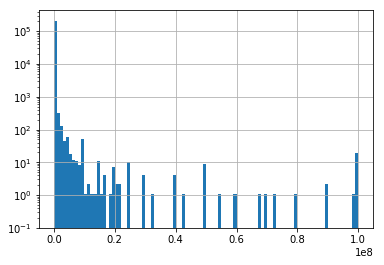

In [142]:
fig, ax = plt.subplots()
df['goal'].hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
# A majority of projects have reasonably sized goals. A few have incredibly tiny goal (0.01)
# and another few have incredibly large goals (100 million?)

In [153]:
df[df['goal'] > 90000000].head(3)
# It's interesting that these 90 million+ projects were created prior to 2018. 
# It'll also be interesting to see the categories that these projects are related to and which category pulls
# the highest project goal average. 

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,created_at_date,created_at_time
4508,1,"You might be asking why I decided to call it ""...","{""id"":360,""name"":""Video"",""slug"":""journalism/vi...",1,US,1479618153,"{""id"":1091086942,""name"":""Daniel Toole"",""is_reg...",USD,$,True,...,False,False,failed,1484977288,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,domestic,2016-11-20,05:02:33
13112,1,We are designing The Multi-Trillion Dollar Dre...,"{""id"":258,""name"":""Architecture"",""slug"":""design...",1,US,1420129462,"{""id"":2004926375,""name"":""Charles J Apgar (dele...",USD,$,True,...,False,False,canceled,1421858983,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,domestic,2015-01-01,16:24:22
15241,1,The new century has begun may our life's get e...,"{""id"":340,""name"":""Space Exploration"",""slug"":""t...",0,AU,1406946130,"{""id"":1086754180,""name"":""John Alexander Mckerr...",AUD,$,True,...,False,False,failed,1412701539,0.928942,"{""web"":{""project"":""https://www.kickstarter.com...",0.928942,domestic,2014-08-02,02:22:10


### Data Cleaning

#### Cleaning up the times

In [28]:
# Looking at the date fields
df.head()[['created_at', 'deadline', 'launched_at', 'state_changed_at']]

,created_at,deadline,launched_at,state_changed_at
0,1509883503,1510518804,1509914004,1510518809
1,1361914696,1365700816,1363108816,1365700816
2,1549877514,1554903476,1552657076,1554903476
3,1502707276,1505921026,1503329026,1505921027
4,1513448977,1534015191,1532805591,1534015191


It looks like these are datetime fields and the dataset is storing them in epoch time. 

In [20]:
# We can import the time module and use either the gmtime or localtime
# to converter epoch to the format we'd like.

import time

epochtime = df.iloc[0]['created_at']

struct = time.gmtime(epochtime)
time_string = time.strftime("%Y-%m-%d, %H:%M:%S", struct)
print(epochtime)
print(time_string)

1509883503
2017-11-05, 12:05:03


In [23]:
def epoch_to_date(epoch):
    struct = time.gmtime(epoch)
    date_string = time.strftime("%Y-%m-%d", struct)
    return date_string
def epoch_to_time(epoch):
    struct = time.gmtime(epoch)
    time_string = time.strftime("%H:%M:%S", struct)
    return time_string

In [27]:
df['created_at_date'] = df['created_at'].apply(epoch_to_date)
df['created_at_time'] = df['created_at'].apply(epoch_to_time)

In [157]:
date_fields = ['created_at', 'deadline', 'launched_at', 'state_changed_at']
for field in date_fields:
    df[field+'_date'] = df[field].apply(epoch_to_date)
    df[field+'_time'] = df[field].apply(epoch_to_time)
# Deciding to keep the original epoch time in case. Time subtractions will be easier to do w/ epoch time than
# w/ string formatted time

#### Cleaning up categories

In [168]:
json.loads(df['category'][0])['slug']

{'id': 313,
 'name': 'Small Batch',
 'slug': 'food/small batch',
 'position': 10,
 'parent_id': 10,
 'color': 16725570,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/food/small%20batch'}}}

In [173]:
json.loads(df['category'][1])['name']

{'id': 298,
 'name': 'Movie Theaters',
 'slug': 'film & video/movie theaters',
 'position': 11,
 'parent_id': 11,
 'color': 16734574,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/film%20&%20video/movie%20theaters'}}}

In [ ]:
df['category_name'] = json.loads(df['category'])

In [176]:
def namepuller(value):
    return json.loads(value)['name']
def slugpuller(value):
    return json.loads(value)['slug']

In [179]:
df['category_name'] = df['category'].apply(namepuller)
df['category_slug'] = df['category'].apply(slugpuller)

In [181]:
df[['category', 'category_name', 'category_slug']].head()

,category,category_name,category_slug
0,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",Small Batch,food/small batch
1,"{""id"":298,""name"":""Movie Theaters"",""slug"":""film...",Movie Theaters,film & video/movie theaters
2,"{""id"":293,""name"":""Drama"",""slug"":""film & video/...",Drama,film & video/drama
3,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",Shorts,film & video/shorts
4,"{""id"":239,""name"":""Radio & Podcasts"",""slug"":""pu...",Radio & Podcasts,publishing/radio & podcasts
